# Imports

In [3]:
import cv2
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from misc.utils import *
import matplotlib.patches as mpatches
from skimage import data, exposure, img_as_float

# Functions

In [87]:
def vidRead(path = './Project2_Dataset1/Night Drive - 2689.mp4'):
    imgs = []
    cap = cv2.VideoCapture(path)
    while(True):
        ret, frame = cap.read()
        if ret:
#             frame =  cv2.undistort(frame, mtx, dist, None, mtx)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            imgs.append(frame)
        else:
            break
    cap.release()
    
    return imgs

def histogram(im_flat):
    bins = 256
    h = np.zeros(bins)
    for i in im_flat:
        h[i] +=1
    return h

def cumulate_distribution(A):
    
    sum_ = A[0]
    c = [sum_]
    for i in range(0,len(A)-1):
        sum_+=A[i+1]
        c.append(sum_)
    return np.array(c)

def normalize(c):
    c = np.array(c)
    return ((c - c.min()) * 255) / (c.max() - c.min())

def AdjustGamma(im_, gamma=1.0):
    """
    Buid a lookup table of
    
    """
    im = im_.copy()
    gamma_inv = 1.0 / gamma
    gammatable = []
    for i in np.arange(0, 256):
        i = (i / 255.0) ** gamma_inv
        gammatable.append(i*255)
    
    gammatable = np.array(gammatable).astype("uint8")
    
    # apply gamma correction using the lookup table
    return cv2.LUT(im, gammatable)

def HistogramEqualization(im):
    for i in range(im.shape[2]):
        im_ = im[:,:,i]
        im_flat =  im_.flatten()
        h = histogram(im_flat)
        c = cumulate_distribution(h)
        c_norm = np.int32(cv2.normalize(c,None, 0,255,cv2.NORM_MINMAX))
#         c_norm  = np.int32(normalize(c))
        im_eq = c_norm[im_flat]
        im_eq = im_eq.reshape(-1,im.shape[1])
        
        if i==0:
            im_eqs = np.array(im_eq)
        else:
            im_eqs = np.dstack((im_eqs,im_eq))
            
    return im_eqs

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

# Code

In [5]:
imgs = vidRead()
len(imgs)

619

In [6]:
outputs = []
for im in imgs:
    imOut =  AdjustGamma(im,2.2)
    outputs.append(imOut)

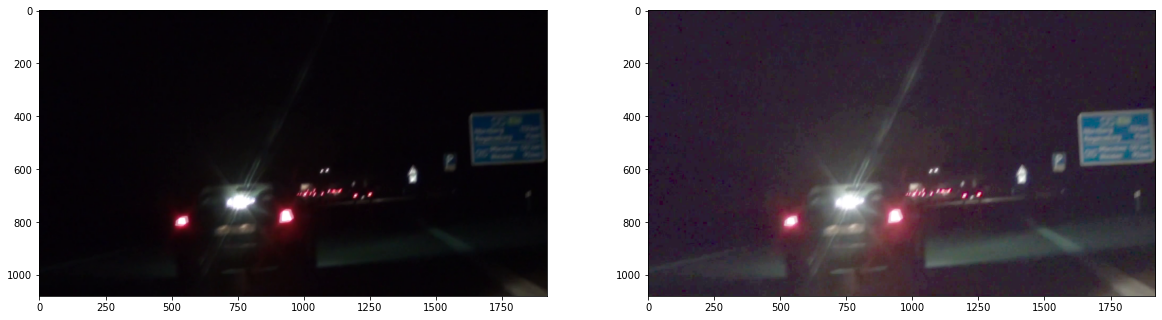

In [14]:
i = 400
fig,plts = plt.subplots(1,2, figsize = (20,10))
plts[0].imshow(imgs[i])
plts[1].imshow(outputs[i])

In [43]:
i=400
im = imgs[i].copy()
print(im[:,:,0].shape)

(1080, 1920)


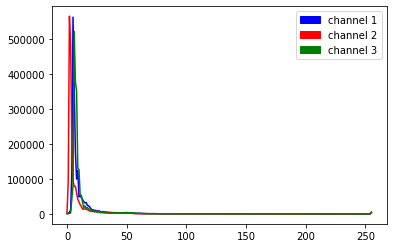

In [44]:
im1flat =  im[:,:,0].flatten()
im2flat =  im[:,:,1].flatten()
im3flat =  im[:,:,2].flatten()
h1 = histogram(im1flat)
h2 = histogram(im2flat)
h3 = histogram(im3flat)

a = mpatches.Patch(color='blue', label='channel 1')
b = mpatches.Patch(color='red', label='channel 2')
c = mpatches.Patch(color='green', label='channel 3')
plt.legend(handles=[a,b,c])

plt.plot(h1 , color= 'blue')
plt.plot(h2, color= 'red')
plt.plot(h3,  color= 'green')


plt.savefig('./Outputs/histogram.png')

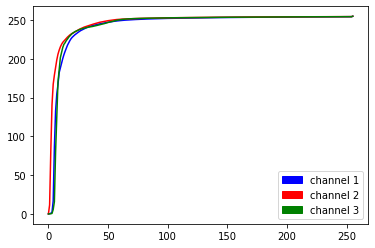

In [45]:
c1 = normalize(cumulate_distribution(h1))
c2 = normalize(cumulate_distribution(h2))
c3 = normalize(cumulate_distribution(h3))

a = mpatches.Patch(color='blue', label='channel 1')
b = mpatches.Patch(color='red', label='channel 2')
c = mpatches.Patch(color='green', label='channel 3')
plt.legend(handles=[a,b,c])

plt.plot(c1 , color= 'blue')
plt.plot(c2, color= 'red')
plt.plot(c3,  color= 'green')

plt.savefig('./Outputs/cumdist.png')

In [99]:
im = imgs[380].copy()
im1 = HistogramEqualization(im)
im1_ = exposure.equalize_hist(im)

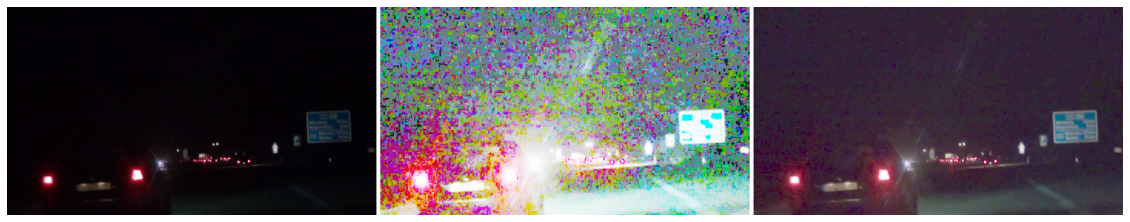

In [102]:
im2 = AdjustGamma(im, 2.4)
partition = np.ones((im.shape[0],20), dtype=np.uint16)*255
partition = np.dstack((partition,partition,partition))
# im.shape
plt.figure(figsize = (20,20))
plt.imshow(np.hstack((im,partition,np.uint8(normalize(im1)),partition,im2)))
plt.axis('off')
plt.savefig("./Outputs/problem1.png")

In [91]:
im_eqs = []
for i in range(im.shape[2]):
    print(i)
    im_ = im[:,:,1]
    im_flat =  im_.flatten()
    h = histogram(im_flat)
    c = cumulate_distribution(h)
    c_norm = np.int32(cv2.normalize(c,None, 0,255,cv2.NORM_MINMAX))

    im_eq = c_norm[im_flat]
    im_eq = im_eq.reshape(-1,im.shape[1])
    im_eqs.append(im_eq)


IndexError: tuple index out of range

In [58]:
def normalize(c):
    c = np.array(c)
    return ((c - c.min()) * 255) / (c.max() - c.min())

def HistogramEqualization(im):
    for i in range(im.shape[2]):
        im_ = im[:,:,i]
        im_flat =  im_.flatten()
        h = histogram(im_flat)
        c = cumulate_distribution(h)
#         c_norm = np.int32(cv2.normalize(c,None, 0,255,cv2.NORM_MINMAX))
        c_norm  = np.int32(normalize(c))
        im_eq = c_norm[im_flat]
        im_eq = im_eq.reshape(-1,im.shape[1])
        
        if i==0:
            im_eqs = np.array(im_eq)
        else:
            im_eqs = np.dstack((im_eqs,im_eq))
            
    return im_eqs

im_eq = HistogramEqualization(im)

In [56]:
im1flat.shape, c1.shape , im_eqc1[im1flat].shape

((2073600,), (256,), (2073600,))

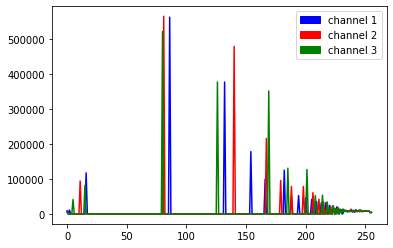

In [69]:
h_eq1 = histogram(im_eq[:,:,0].flatten())
h_eq2 = histogram(im_eq[:,:,1].flatten())
h_eq3 = histogram(im_eq[:,:,2].flatten())


a = mpatches.Patch(color='blue', label='channel 1')
b = mpatches.Patch(color='red', label='channel 2')
c = mpatches.Patch(color='green', label='channel 3')
plt.legend(handles=[a,b,c])

plt.plot(h_eq1 , color= 'blue')
plt.plot(h_eq2, color= 'red')
plt.plot(h_eq3,  color= 'green')

plt.savefig('./Outputs/eq_hist.png')

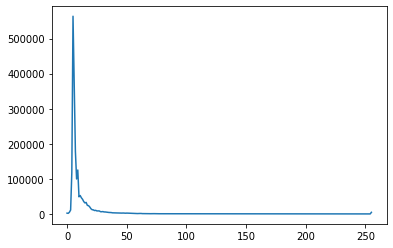

In [66]:
h = histogram(im[:,:,0].flatten())
plt.plot(h)

In [16]:
"""
https://github.com/torywalker/histogram-equalizer/blob/master/HistogramEqualization.ipynb
"""
    
# put pixels in a 1D array by flattening out img array
flat = img1.flatten()

# create our own histogram function
def histogram(im_flat, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for i in im_flat:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

# get the value from cumulative sum for every index in flat, and set that as img_new
im_new = cs[flat]



usage: ipykernel_launcher.py [-h] [--DataPath DATAPATH]
                             [--SaveFileName SAVEFILENAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/gokul/.local/share/jupyter/runtime/kernel-74efff97-8e81-4416-a907-4f7c03568ac0.json


SystemExit: 2

/home/gokul/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
